In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize
import scipy.stats as stats

In [2]:
%matplotlib inline

# 4.1 Understanding the Model
## 4.1.1 Differential Spectrum

In [5]:
# Global Constants
C = 1.433488*10**-13        # Prefactor
me = "MISSING"     # Electron mass
alpha = "MISSING"  # Fine structure constant



In [5]:
def fermi_function(beta: float) -> float:
    eta = (2*alpha)/beta
    return (2*np.pi*eta)/(1-np.exp(-2*np.pi.eta))*(1.002037-0.001427*beta)   # Formula for fermi function

In [6]:
def differential_spectrum(E: float, mnu2: float, E0: float) -> float:
    # Calculate approximations
    Etot = E + me 
    p = np.sqrt(Etot**2 - me**2)
    beta = Etot/p
    F = fermi_function(beta)
    # Calculate mnu
    mnu = np.sqrt(mnu2*np.heaviside(mnu2, 0))
    # Calculation differential rate
    return np.nan_to_num(C*F*p*(E+me)*(E0-E)*np.sqrt((E0-E)**2)) * np.heaviside(E0-E-mnu) # formula for the differential spectrum

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

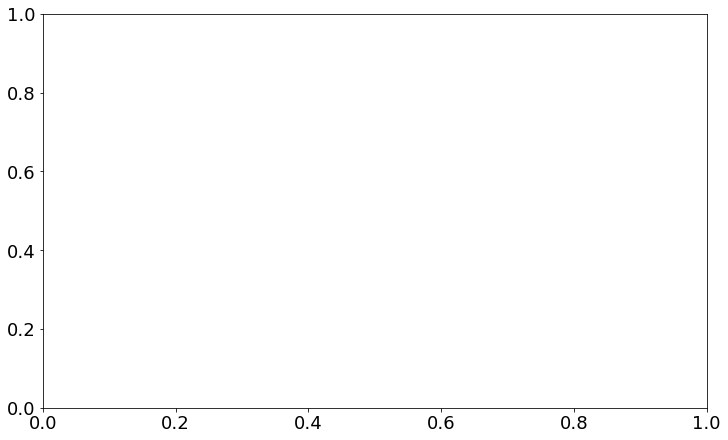

In [7]:
# positive neutrino masses
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
x = np.linspace() # energy values where the differential spectrum is evaluated
for mnu in "MISSING":
    y = differential_spectrum(E=x, mnu2=mnu**2, E0="MISSING")
    ax.plot(x, y, '-', label=r"$m_{\nu}=$"+f"{mnu:.0f}"+r"$\,$eV");
ax.legend();
plt.locator_params(axis='x', nbins=5);
ax.set_xlabel("MISSING")
ax.set_ylabel("MISSING");

TypeError: ufunc 'heaviside' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

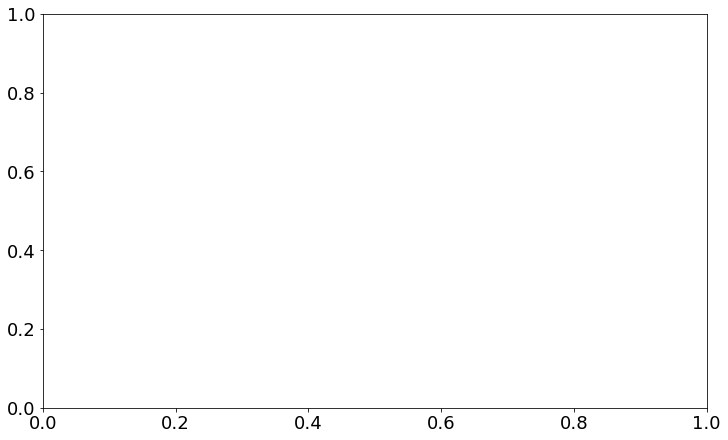

In [8]:
# negative neutrino mass
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
x = "MISSING" # energy values where the differential spectrum is evaluated

y1 = differential_spectrum(E=x, mnu2="MISSING", E0="MISSING")
ax.plot(x, y1, '-', label=r"$m_{\nu}^2=0\,$eV$^2$");

y2 = differential_spectrum(E=x, mnu2="MISSING", E0="MISSING")
ax.plot(x, y2, '-', label=r"$m_{\nu}^2=-1\,$eV$^2$");

ax.legend();
plt.locator_params(axis='x', nbins=5);
ax.set_xlabel("MISSING")
ax.set_ylabel("MISSING");

### 4.1.2 Transmission function ###

In [10]:
def transmission(qU, E, *, Bana=2.52, Bmax=4.23, Bsource=6.3*10**(-4)) -> float:
    """Transmission function of the spectrometer.
    
    Parameters
    ----------
    qU: Retarding energy.
    E: Electron energy.
    Bana: Magnetic field in the analyzing plane.
    Bmax: Maximal magnetic field.
    Bsource: Magnetic field in the source.
    
    Returns
    ----------
    Transmission probability.
    """
    # Compute relativistic factor
    f = ((E-qU) +2 )/(E/me + 2)
    # Compute slope part of transmission
    T = np.nan_to_num("MISSING")
    # Put everything together with heaviside functions
    return np.heaviside(E-qU, 1)*T*np.heaviside("MISSING",1)+np.heaviside("MISSING",0)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

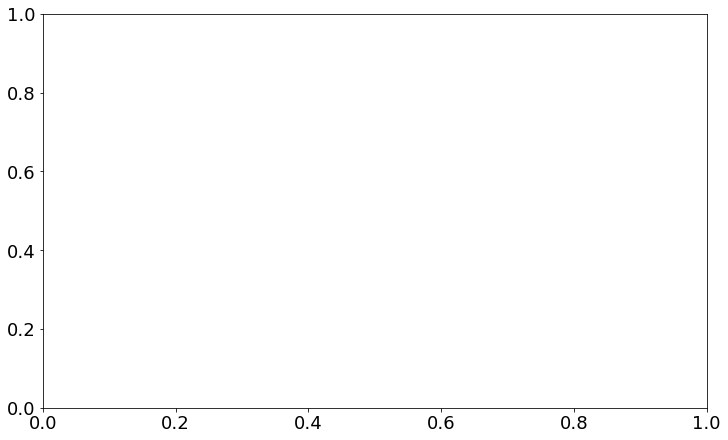

In [11]:
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

qU = "MISSING"
x = "MISSING"
y = transmission(qU=qU, E=x, Bana="MISSING", Bmax="MISSING", Bsource="MISSING")

ax.plot(x-qU, y, '-');
plt.locator_params(axis='x', nbins=7);
ax.set_xlabel("MISSING")
ax.set_ylabel("MISSING");



TypeError: unsupported operand type(s) for -: 'str' and 'str'

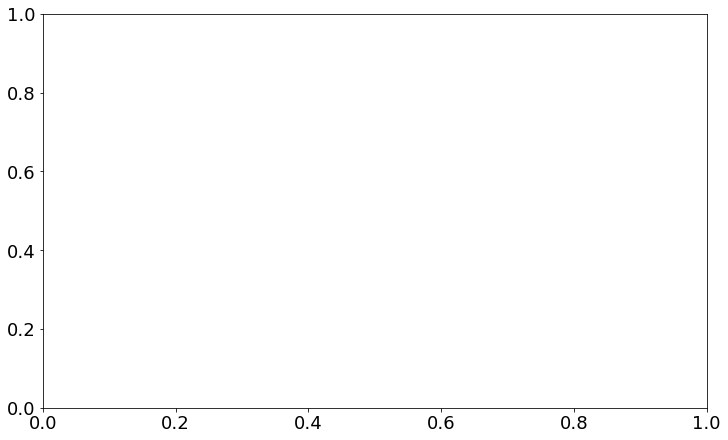

In [12]:
# transmission function for different Bana
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

qU = "MISSING"
x = "MISSING"

for Bana in "MISSING":
    y = transmission(qU=qU, E=x, Bana=Bana, Bmax="MISSING", Bsource="MISSING")
    ax.plot(x-qU, y, '-', label=r"$B_{\mathrm{ana}}=%s \,$G"%f"{Bana*1E4:.1f}");

ax.legend();
plt.locator_params(axis='x', nbins=7);
ax.set_xlabel("E-qU (eV)")
ax.set_ylabel("Transmission probability");



TypeError: unsupported operand type(s) for -: 'str' and 'str'

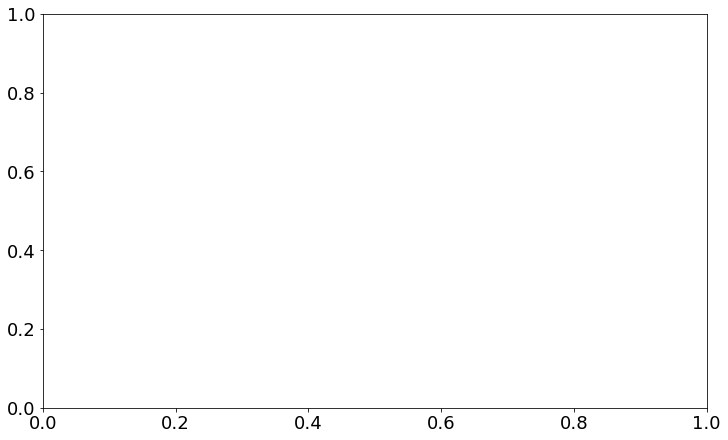

In [13]:
# transmission function for different Bmax
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

qU = "MISSING"
x = "MISSING"

for Bmax in "MISSING":
    y = transmission(qU=qU, E=x, Bana="MISSING", Bmax=Bmax, Bsource="MISSING")
    ax.plot(x-qU, y, '-', label=r"$B_{\mathrm{max}}=%s \,$T"%f"{Bmax:.2f}");

ax.legend();
plt.locator_params(axis='x', nbins=7);
ax.set_xlabel("E-qU (eV)")
ax.set_ylabel("Transmission probability");



### 4.1.3 Dummy model ###

In [14]:
def integrated_spectrum(qU: float, mnu2: float, E0: float) -> float:
    """Integrated spectrum.
    
    Parameters
    ----------
    qU: Retarding energy.
    mnu2: Neutrino mass squared.
    E0: Endpoint.
    
    Returns
    ----------
    Integrated rate.
    """
    # Define integrand
    def integrand(x: float) -> float:
        return "MISSING"(E=x, mnu2=mnu2, E0=E0)*"MISSING"(qU=qU, E=x)
    # Calculate the integral
    return integrate.quad(integrand, qU, E0)[0]

<>:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<ipython-input-14-b5e494a0ccac>:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  return "MISSING"(E=x, mnu2=mnu2, E0=E0)*"MISSING"(qU=qU, E=x)
<ipython-input-14-b5e494a0ccac>:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  return "MISSING"(E=x, mnu2=mnu2, E0=E0)*"MISSING"(qU=qU, E=x)


In [15]:
def dummy_model(qU: float, mnu2: float, E0: float, B: float, A: float) -> float:
    """Dummy model.
    
    Parameters
    ----------
    qU: Retarding energy.
    mnu2: Neutrino mass squared.
    E0: Endpoint.
    B: Background.
    A: Normalization.
    
    Returns
    ----------
    Model rate at qU.
    """
    return "MISSING"*integrated_spectrum(qU=qU, mnu2=mnu2, E0=E0)+"MISSING"

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

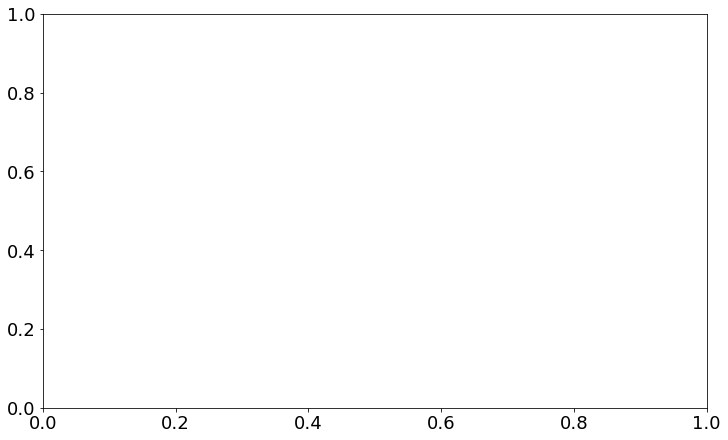

In [16]:
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

x = "MISSING" ## also try changing the lower limit to see the difference

for mnu in "MISSING":
    y = np.array([dummy_model(qU=_x, mnu2=mnu**2, E0="MISSING", B="MISSING", A="MISSING") for _x in x])
    ax.plot(x, y, '-', label=r"$m_{\nu}=$"+f"{mnu:.0f}"+r"$\,$eV");
ax.legend();
plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("MISSING")
ax.set_ylabel("MISSING");

In [17]:
# Define parameters for Rchanged (use lists)
mnu2 = "MISSING"
E0 = "MISSING"
A = "MISSING"
B = "MISSING"

# Compute reference model
x = "MISSING"
yref = np.array([dummy_model(qU=_x, mnu2="MISSING", E0="MISSING", B="MISSING", A="MISSING") for _x in x])

TypeError: must be real number, not str

TypeError: must be real number, not str

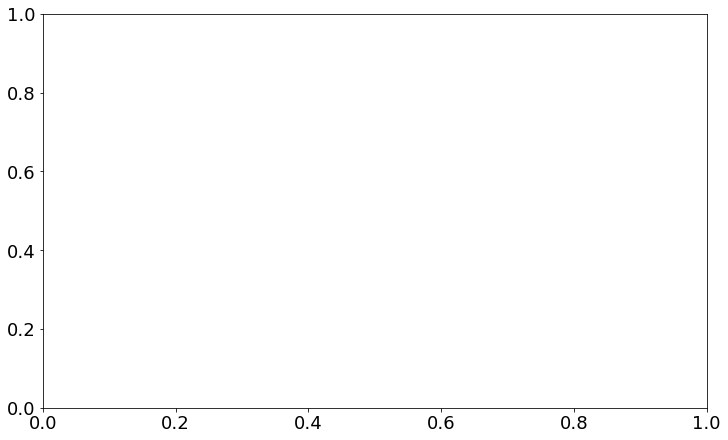

In [18]:
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

for _mnu2 in mnu2:
    ychanged = np.array([dummy_model(qU=_x, mnu2=_mnu2, E0="MISSING", B="MISSING", A="MISSING") for _x in x])
    ax.plot(x, "MISSING", '-', label=r"$m_{\nu}^2=$"+f"{_mnu2:.1f}"+r"$\,$eV$^2$"); # insert relation of reference and changed spectrum
    
ax.legend();
plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)")
ax.set_ylabel("MISSING");

# repeat this part of code for the other three parameters 



In [19]:
def root_search(x):
    return dummy_model(qU=x, mnu2=0, E0="MISSING", B="MISSING", N="MISSING") - "MISSING" / "MISSING" - "MISSING" # complete the relation so that the return statement becomes negative at the point where signal=background
print(f"The signal-to-background ratio is 1 at qU={optimize.root_scalar(root_search, bracket=(18535, 18581)).root:.2f}")

TypeError: 'str' object is not callable

### 4.2 Basics of Data Analysis ###

In [21]:
def simplified_model(E: float, mnu2: float, E0: float, B: float, A: float) -> float:
    """Simplified (differential) model.
    
    Parameters
    ----------
    E: Energy.
    mnu2: Neutrino mass squared.
    E0: Endpoint.
    B: Background.
    A: Normalization.
    
    Returns
    ----------
    Model rate at qU.
    """
    return "MISSING"*"MISSING"(E=E, mnu2=mnu2, E0=E0)+"MISSING"

<>:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<ipython-input-21-915a254f9b53>:16: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  return "MISSING"*"MISSING"(E=E, mnu2=mnu2, E0=E0)+"MISSING"


### 4.2.1 Monte Carlo Data ###

In [23]:
# MTD
Elin = "MISSING"
tlin = np.ones(24)/24
ttot = "MISSING" # give total time in seconds

In [24]:
# Calculate Asimov spectrum
x = "MISSING"
rate_asimov = simplified_model(E=Elin, mnu2="MISSING", E0="MISSING", A="MISSING", B="MISSING")
counts_asimov = rate_asimov*"MISSING"*"MISSING"

# Plot Asimov spectrum
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.plot("MISSING", "MISSING", '.', label="Asimov");

plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)");
ax.set_ylabel("MISSING");
ax.legend();

TypeError: 'str' object is not callable

In [25]:
# Generate fluctuated spectra

fluctuated_spectra = []
for c in counts_asimov:
    fluctuated_spectra.append(np.random.poisson(lam=c, size="MISSING"))
fluctuated_spectra = np.array(fluctuated_spectra).T # fluctuated spectra are given in counts per energy point 

# Plot one together with the Asimov one
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.plot(Elin, rate_asimov, '.', label="Asimov");
ax.plot(Elin, fluctuated_spectra[0]/"MISSING", '.', label="Fluctuated"); # with "MISSING" you convert counts to rate

plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)");
ax.set_ylabel("MISSING");
ax.legend();

NameError: name 'counts_asimov' is not defined

In [26]:
# Plot one qU point as cross-check

qUIndex = 0 # Get the point in the spectrum by index
asimov = counts_asimov[qUIndex]/("MISSING"[qUIndex]) # with "MISISNG" you convert counts to rate
fluctuated = fluctuated_spectra[:, qUIndex]/("MISSING"[qUIndex]) # with "MISISNG" you convert counts to rate

plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.hist(fluctuated, bins=25, alpha=0.6, label=f"Fluctuated")
ax.axvline(asimov, label="Asimov")

plt.locator_params(axis='x', nbins=5);
ax.set_xlabel(f"Rate (a.u.) at {Elin[qUIndex]:.1f}" +r"$\,$eV");
ax. ticklabel_format(useOffset=False)
ax.set_ylabel("Entries");
ax.legend();



NameError: name 'counts_asimov' is not defined

In [27]:
# Calculate standard deviation at each E
sigma = np.std("MISSING", axis=0)

# Plot the standard deviation vs lambda
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.plot(Elin, "MISSING", '.');

plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)");
ax.set_ylabel(r"$\sigma(E)$ / $\lambda(E)$");

# Plot the standard deviation vs the expectation (=sqrt(counts))
plt.rcParams.update({'font.size':18});
fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));
ax.plot(Elin, "MISSING", '.');

plt.locator_params(axis='x', nbins=6);
ax.set_xlabel("Retarding energy (eV)")
ax.set_ylabel(r"$\sigma(E)$ / $\sqrt{\lambda(E)}$");



AxisError: axis 0 is out of bounds for array of dimension 0

### 4.2.2 Parameter Inference ###

In [29]:
def chisquared(func, xdata: np.array, ydata: np.array, pmodel: np.array, sigma: np.array) -> float:
    """Returns the chi squared for given function and values.

    Parameters
    ----------
    func: Model function.
    xdata: Data of the x-axis.
    ydata: Data of the y-axis. Must have the same shape as xdata.
    pmodel: Model parameters
    sigma: Uncertainty of ydata. Must have the same shape as xdata of has to be a float.

    Returns
    ----------
    Chi Squared for model and values.
    """
    return np.sum(((func("MISSING", *pmodel)-"MISSING")/"MISSING")**2)

In [30]:
# Define chi2 as a function of parameters for fixed Asimov data
def chi2(params) -> float:
    """Return the chi2 as a function of params"""
    mnu2, E0, B, N = params
    xdata = "MISSING"
    ydata = "MISSING"
    sigma = np.sqrt("MISSING")/"MISSING" # sigma is here the uncertainty on the rate
    return chisquared(func=simplified_model, xdata=xdata, ydata=ydata, pmodel=params, sigma=sigma)

In [31]:
# Fit Asimov data using chi2 minimization
# Initial value for parameters
x0 = "MISSING" # change one parameter value slightly with regard to the reference values to ensure correct minimization
# Minimize 
result_asimov = optimize.minimize(chi2, x0=x0, method="Nelder-Mead", tol=1e-8)
print("### Fit on Asimov data ###")
print("Best fit at: ", result_asimov.x)
print(f"Chi2 = {result_asimov.fun}")

ValueError: could not convert string to float: 'MISSING'

In [32]:
# Do the same on fluctuated data
Parameters = []
for i, dataset in enumerate("MISSING"):
    # Print progress
    print(f"Progress: {(i+1)/len(fluctuated_spectra)*1E2:.1f}%", end="\r", flush=True)
    # Adapt definition of chi2 for different data
    def _chi2(params) -> float:
        """Return the chi2 as a function of params"""
        xdata = "MISSING"
        ydata = "MISSING"/"MISSING" # the second "MISSING" converts counts to rate
        sigma = np.sqrt("MISSING")/"MISSING"
        return chisquared(func=simplified_model, xdata=xdata, ydata=ydata, pmodel=params, sigma=sigma)
    # Initial value for parameters
    x0 = "MISSING"
    # Minimize 
    result = optimize.minimize(_chi2, x0=x0, method="Nelder-Mead", tol=1e-8)
    if result.success:
        Parameters.append([*result.x, result.fun])
    else:
        print(f"Minimization did not converge")
Parameters = np.array(Parameters)

ZeroDivisionError: division by zero

In [33]:
# Plot parameter distributions
Labels = [r"$m_{\nu}^2$ (eV$^2$)", r"$E_{0}$ (eV)", r"$B$ (cps)", r"N", r"$\chi^2$"]

for param, label in zip(Parameters.T, Labels):
    plt.rcParams.update({'font.size':18});
    fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True);
    ax.hist("MISSING", bins=50, density=True)
    
    plt.locator_params(axis='x', nbins=6);
    ax.set_xlabel(label)
    ax.set_ylabel("Normalized entries")
    
    if label == r"$\chi^2$":
        xlin = np.linspace(np.min(param), np.max(param), 500)
        ylin = stats.chi2.pdf(xlin, df="MISSING") # degrees of freedom (df) are number of data points - number of fit parameters
        ax.plot(xlin, ylin, color="tab:orange")


AttributeError: 'list' object has no attribute 'T'

### 4.2.3 Uncertainty and Sensitivity ###

In [35]:
def profile(mnu2):
    """For given mnu2, minimize the chi2 w.r.t. the other parameters"""
    # Define chi2 as a function of parameters without neutrino mass for fixed Asimov data
    def chi2(params) -> float:
        """Return the chi2 as a function of params"""
        "MISSING" = params # Hint: neutrino mass is now no longer a free fit parameter
        xdata = "MISSING"
        ydata = "MISSING" # use the Asimov data
        sigma = np.sqrt("MISSING")/"MISSING"
        return chisquared(func=simplified_model, xdata=xdata, ydata=ydata, pmodel=[mnu2, *params], sigma=sigma)
    # Initial guess
    x0 = "MISSING"
    # Minimize 
    result = optimize.minimize(chi2, x0=x0, method="Nelder-Mead")
    if result.success:
        return result.fun
    else:
        print(f"Not converged for mnu2={mnu2}")

def root_search(mnu2):
    """Return difference of chi square distribution to 1"""
    return (profile(mnu2)-result_asimov.fun) - "MISSING" # complete the relation so that the return statement becomes negative if \Delta chi^2 = 1

SyntaxError: cannot assign to literal (<ipython-input-35-a46430abe29c>, line 6)

In [36]:
result_upper = optimize.root_scalar(root_search, bracket=(0, 5))
if result_upper.converged:
    mnu2_upper = result_upper.root
else:
    print(f"Not converged")
result_lower = optimize.root_scalar(root_search, bracket=(-5, 0))
if result_lower.converged:
    mnu2_lower = result_lower.root
else:
    print(f"Not converged")
print(mnu2_lower, mnu2_upper)

TypeError: 'str' object is not callable

<>:7: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:7: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<ipython-input-37-b121602fc105>:7: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  y = np.array(["MISSING"(_x) for _x in x])


TypeError: 'str' object is not callable

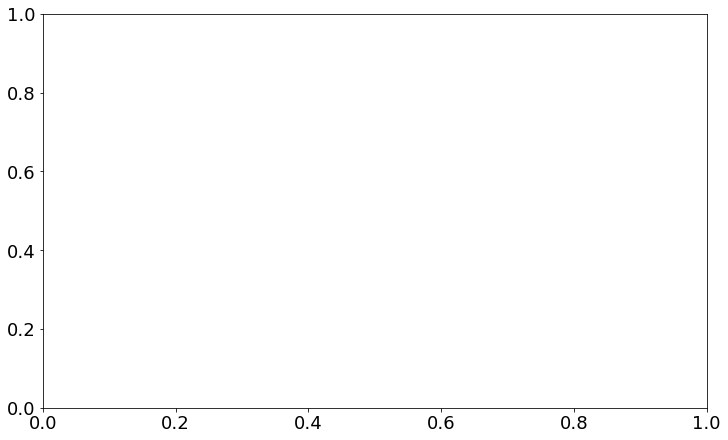

In [37]:
# Plot a chi2 profile

fig, ax = plt.subplots(constrained_layout=True, figsize=(10,6));

# Range of mnu2
x = "MISSING"
y = np.array(["MISSING"(_x) for _x in x])
ax.plot(x, y)

# Plot horizontal lines
ax.axhline(result_asimov.fun+1, ls="--", color="gray")

plt.locator_params(axis='x', nbins=6);
ax.set_xlabel(r"$m_{\nu}^2$ (eV$^2$)");
ax.set_ylabel(r"$\chi^2$");

In [38]:
print(f"Sensitivity is {np.sqrt("MISSING"*mnu2_upper):.2f} eV") # insert factor for 90 % C.L.

SyntaxError: invalid syntax (<ipython-input-38-a4a2e14e0e0d>, line 1)